In [29]:
import pandas as pd

data = pd.read_csv("data.csv")
data["time"] = pd.to_datetime(data["ts"], format='mixed').dt.time

In [30]:
timestamps = pd.Series(["2024-08-21 09:26:38", "2024-08-21 09:27:48", "2024-08-21 09:41:00", '2024-08-21 09:42:10', '2024-08-21 09:55:25', \
                '2024-08-21 09:56:55', '2024-08-21 10:06:17', '2024-08-21 10:07:47', '2024-08-21 10:25:00','2024-08-21 10:26:20',\
                '2024-08-21 10:35:25', '2024-08-21 10:36:45', '2024-08-21 10:40:13', '2024-08-21 10:41:33', '2024-08-21 10:45:52',\
                '2024-08-21 10:47:22', '2024-08-21 10:49:37', '2024-08-21 10:51:07', '2024-08-21 12:17:03','2024-08-21 12:27:53',\
                '2024-08-21 12:44:41', '2024-08-21 12:49:51', '2024-08-21 12:56:45', '2024-08-21 13:04:15'])

timestamps = pd.DataFrame(timestamps, columns=["timestamps"])
timestamps['time'] = pd.to_datetime(timestamps["timestamps"], format='mixed').dt.time

In [31]:
import plotly.express as px

fig = data.plot(x="time", y="cte")

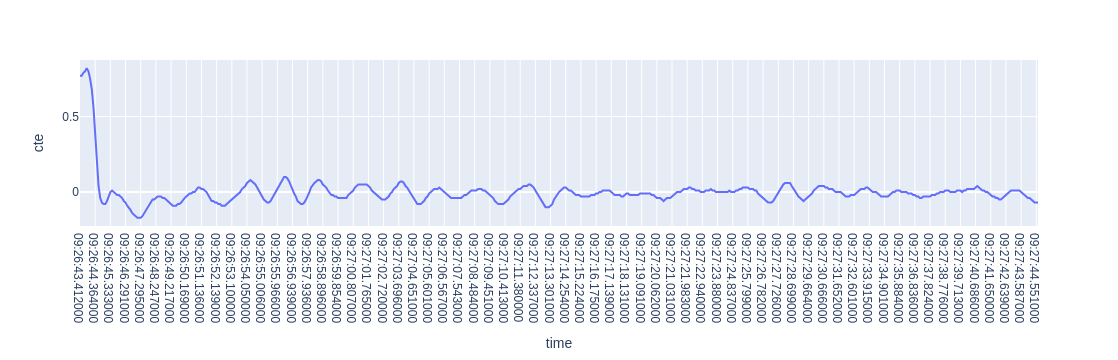

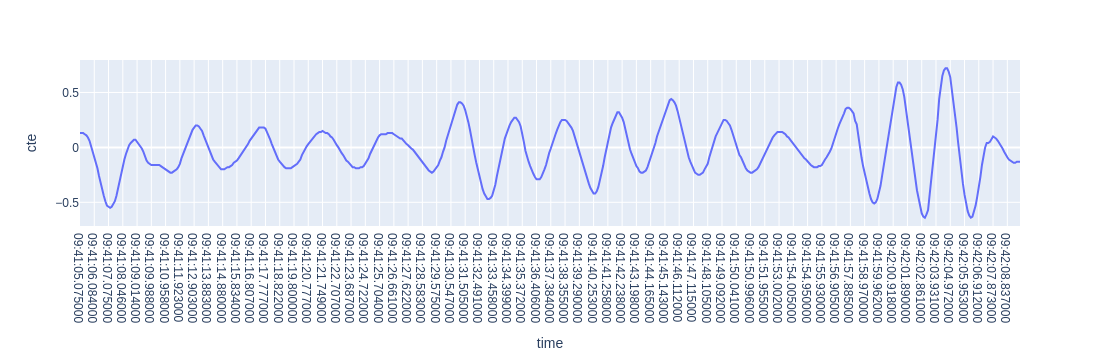

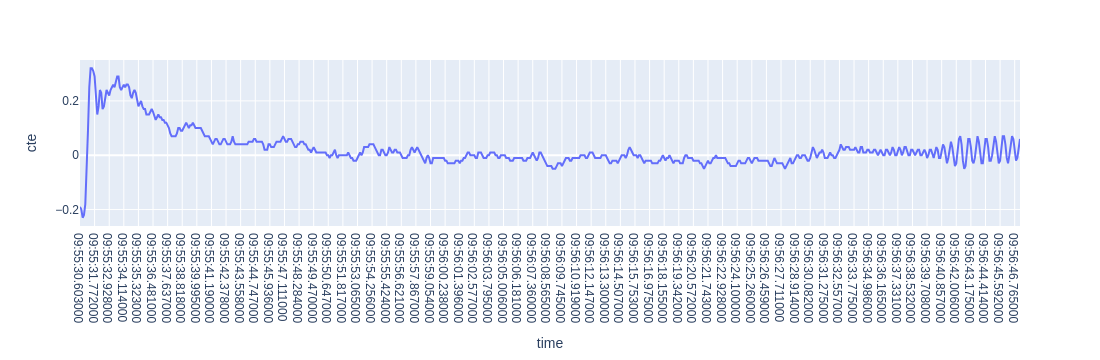

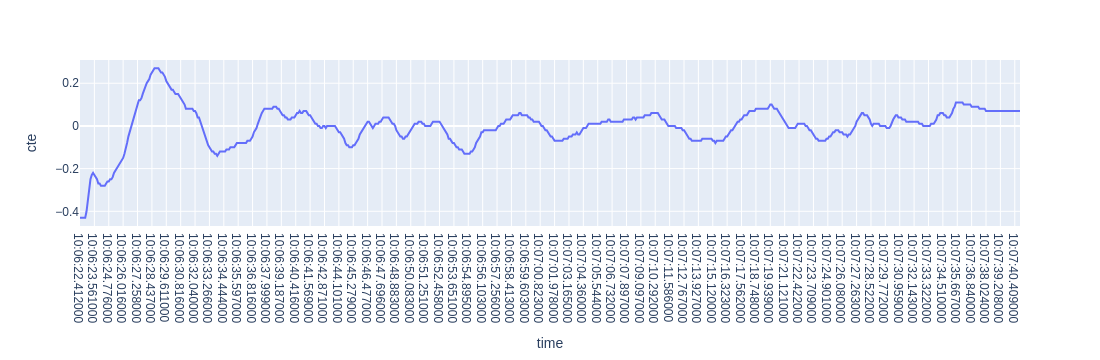

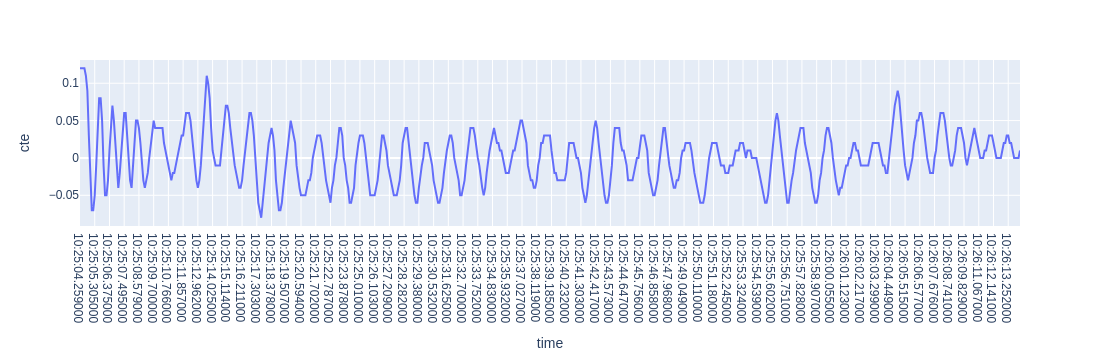

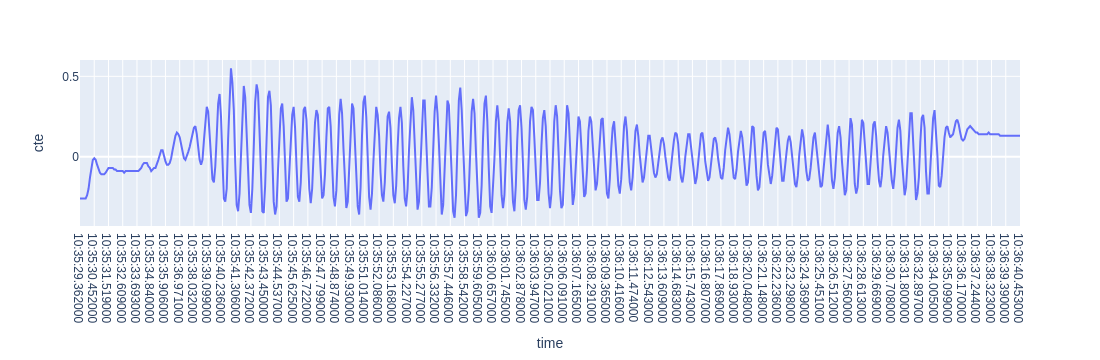

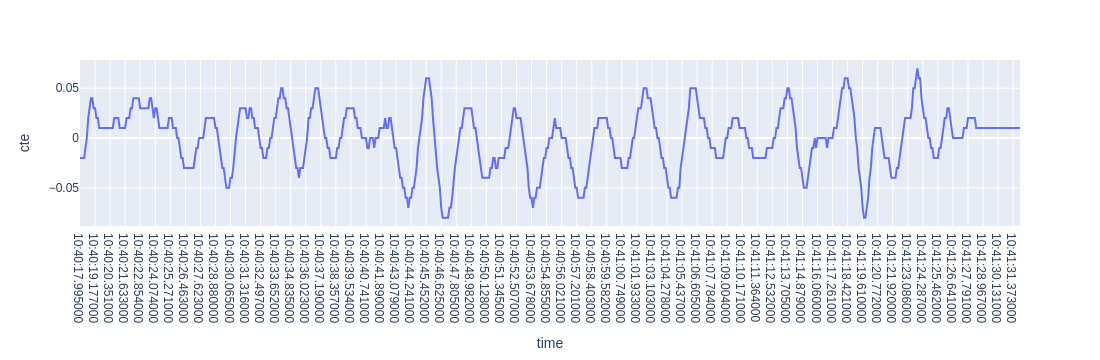

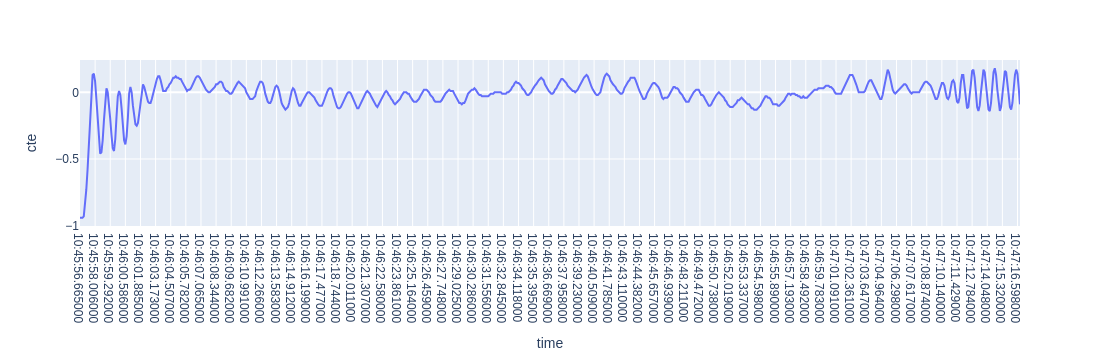

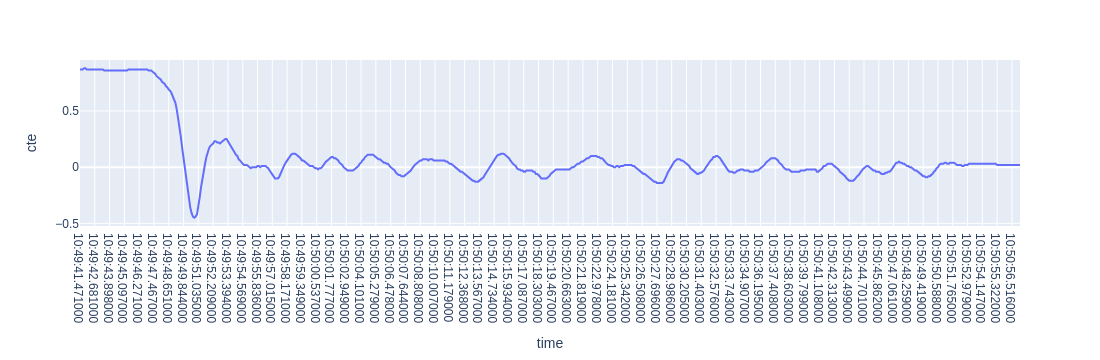

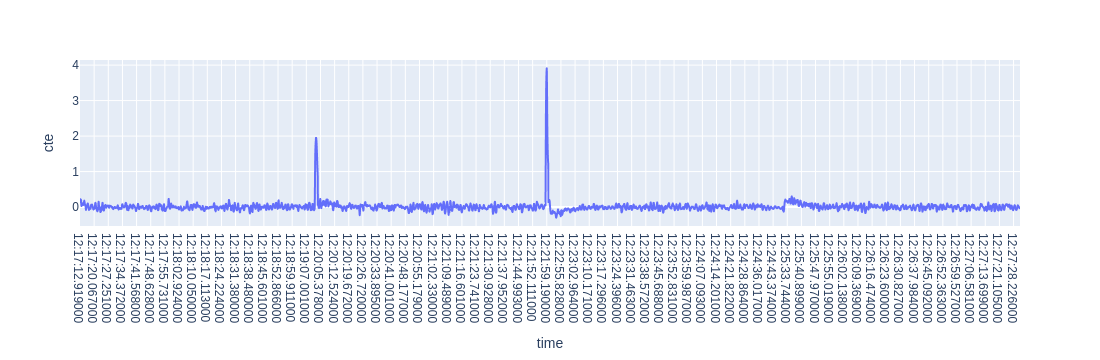

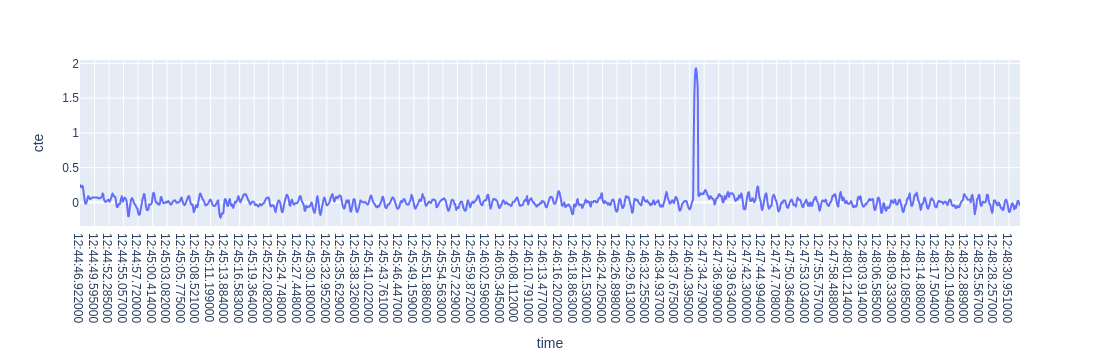

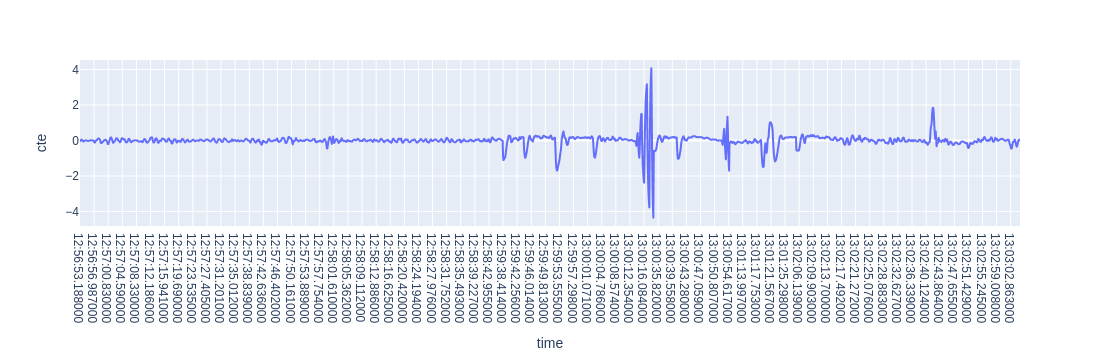

In [32]:
pd.options.plotting.backend = "plotly"

for i in range(0, timestamps.shape[0], 2):
    start = timestamps.at[i, "time"]
    end = timestamps.at[i + 1, "time"]
    piece_of_data = data[(end >= data["time"]) & (data['time'] >= start)]
    fig = piece_of_data.plot(x="time", y="cte")
    fig.show()